In [1]:
import torch
from torch.utils.tensorboard import SummaryWriter
import csv

file1=open('./grad_data/grad1.csv',mode='r')
csvReader=csv.reader(file1)
w_size_list=[150,2400,48000,10080,840] # weight,bias size
b_size_list=[6,16,120,84,10]

grad_data=list()
weight_data=list()
# Structure
# time layer element
# grad_data = weight ,bias 순서의 layer별 데이터
# weight_data=weight의 time list, layer list, element tensor
# data read
for i,line in enumerate(csvReader):
    line_float=list(map(float,line))
    grad_data.append(list())
    weight_data.append(list())
    for num_w,num_b in zip(w_size_list,b_size_list):
        tmp_w=torch.tensor(line_float[:num_w])
        line=line[:num_w]
        grad_data[-1].append(tmp_w)
        weight_data[-1].append(tmp_w)

        tmp_b=torch.tensor(line_float[:num_b])
        line=line[:num_b]
        grad_data[-1].append(tmp_b)

print(len(weight_data))
TIME_STEP=len(weight_data)
print(len(weight_data[0]))
for w in weight_data[0]:
    print(w.size())

    

50
5
torch.Size([150])
torch.Size([2400])
torch.Size([48000])
torch.Size([10080])
torch.Size([840])


In [2]:
import matplotlib.pyplot as plt

total_size=len(weight_data)
plt.figure(figsize=(30, 15))
for i, w in enumerate(weight_data):
    plt.subplot(total_size,1,i+1)
    plt.boxplot([w[0]])
plt.title('layer_grad_weight')
plt.savefig('fig1.png', dpi=300)

Error in callback <function flush_figures at 0x000001F41A390040> (for post_execute):


KeyboardInterrupt: 

In [25]:
# element에 대해서 time기반 비교
elem_sum_w=list()
time_list=list()
for t,_ in enumerate(weight_data):
    time_list.append(t)

# 시간에 대해서 저장
# layer elem time 순 -> elem_w_list
elem_w_list=[[list() for _ in w] for w in weight_data[0]]# 뒤에 시간별로 더하면됨

for t,w in enumerate(weight_data):# 모든 시간 t에 대해서
    for j,w_layer in enumerate(w):# 각 layer에 대해서
        for i,elem_w in enumerate(w_layer): #layer내에 대해서
            elem_w_list[j][i].append(elem_w)
print("Done")

Done


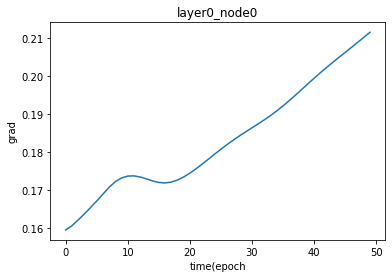

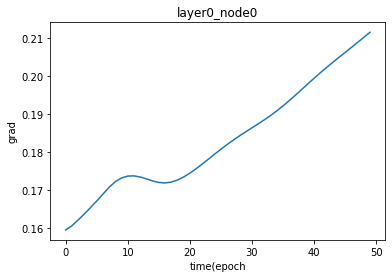

<ipython-input-26-9db47e21845c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


KeyboardInterrupt: 

In [26]:
#elem_w_list의 size: layer,weight_i
# plot and save
for j,w_node in enumerate(elem_w_list):
    for i,w_elem in enumerate(w_node):
        plt.figure()
        plt.plot(time_list,w_elem)
        plt.title('layer{}_node{}'.format(j,i))
        plt.xlabel('time(epoch')
        plt.ylabel('grad')
        plt.savefig('./grad_data/layer{}_node{}.png'.format(j,i),dpi=200,facecolor='#eeeeee')

In [ ]:
#time 기반 layer별로 grad 값을 모두 합쳐서 비교
# elem_w_list
#

#sum_w
# layer,time,weight_sum(elem들의 float)

sum_w=[[0.0 for i in ] for w in elem_w_list] # layer내의 
for i,node_w in enumerate(elem_w_list):# layer구분
    for elem_w in node_w:
        sum_w[i].append
    


